# EC2 - creep

In [1]:
%matplotlib inline
import math as m
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from ipywidgets import interact

In [2]:
h0 = widgets.FloatSlider(value=200,min=100,max=1000,step=0.025,description='h0 (mm):',readout_format='.0f')
t = widgets.FloatLogSlider(value=100000,min=0,max=6,step=0.025,description='t (d):',readout_format='.0f')
t0 = widgets.FloatSlider(value=10,min=3,max=60,step=1,description='t0 (d):',readout_format='.0f')
rh = widgets.FloatSlider(value=80,min=0,max=100,step=1,description='RH (%):',readout_format='.0f')
fck = widgets.FloatSlider(value=20,min=20,max=50,step=5,description='fck (MPa):',readout_format='.0f')
fck2 = widgets.Dropdown(
    options=[('C20/25', 20.0), ('C25/30', 25.0), ('C30/37', 30.0), ('C35/45', 35.0), ('C40/50', 40.0), ('C45/55', 45.0), ('C50/60', 50.0)],
    value=20,
    description='Concrete:',
)
cem = widgets.Dropdown(
    options=[('Type R', 1.0), ('Type N', 0.0), ('Type S', -1.0)],
    value=0.0,
    description='Cement:'
)
#fyk2 = widgets.Dropdown(
#    options=[('A400', 400.0), ('A500', 500.0)],
#    value=400,
#    description='Steel:',
#)
#med = widgets.FloatSlider(value=100,min=1,max=1000,step=1,description='Med (kNm):',#readout_format='.0f')
#tab1 = VBox(children=[t,h0,t0,rh,fck])

In [3]:
def creep_coef(t=28, h0=100,rh=65, t0=10, fck=20.0, cem=0.0):
    fcm = fck+8
    alpha1 = (35/fcm)**0.7
    alpha2 = (35/fcm)**0.2
    alpha3 = min(1.0, (35/fcm)**0.5)
    tt0 = t0*((1.0+9.0/(2.0+t0**1.2))**cem)
    phi_RH = (1.0-rh/100)/(0.1*(h0**0.33333333))
    phi_RH = 1.0+phi_RH if fcm <= 35 else (1.0+phi_RH*alpha1)*alpha2
    beta_fcm = 16.8/m.sqrt(fcm)
    beta_t0 = 1.0/(0.1+tt0**0.2)
    phi_0 = beta_fcm*beta_t0*phi_RH

    try:        
        betah = min(1500*alpha3, 1.5*(1.0+m.pow(0.012*rh,18))*h0+250*alpha3)
        beta_cc = m.pow((t-t0)/(betah+t-t0), 0.3)
        phi = beta_cc*phi_0    
    except:
        beta_cc = m.nan
        phi = m.nan

    return phi
    
@interact(h0=h0, t=t, t0=t0, rh=rh, fck=fck, cem=cem)
def creepcoef(t=28, h0=100,rh=65, t0=10, fck=20.0, cem=0.0):
    creep = creep_coef(t, h0,rh, t0, fck, cem)
    #print("fhi={:.3f} betha_cc={:.3f} fhi_0={:.3f}".format(phi, beta_cc, phi_0))
    print("fhi={:.3f}".format(creep))

interactive(children=(FloatLogSlider(value=100000.0, description='t (d):', max=6.0, readout_format='.0f', step…

In [4]:
_t = 100000
_h0 = 150
_rh = 80
_t0 = 10
_fck = 20
_cem = -1
creepcoef(_t,_h0,_rh,_t0,_fck,_cem)

fhi=2.795


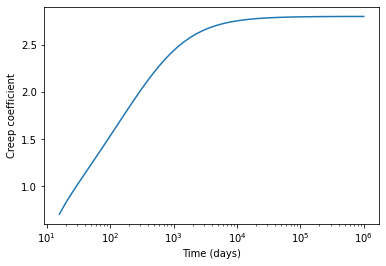

In [5]:
tt = np.logspace(1.2, 6)
vfunc = np.vectorize(creep_coef)
creep = vfunc(tt, _h0,_rh,_t0,_fck,_cem)
plt.xscale("log")
plt.xlabel("Time (days)")
plt.ylabel("Creep coefficient")
plt.plot(tt, creep)